 **Introduction**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.**

**Problem Statement**

Yulu, a leading micro-mobility service provider in India, is facing revenue setbacks and seeks to understand the factors influencing the demand for their shared electric cycles. This analysis aims to identify significant predictors of demand and examine patterns and differences in usage across various conditions such as weekdays versus weekends, different weather conditions, and seasons.

**Objectives**

**Identify Significant Variables**:

Determine which variables (e.g., temperature, humidity, wind speed, season, weather conditions, holidays, and working days) significantly affect the demand for shared electric cycles. Understand how these variables describe and influence the demand for electric cycles.

**Analyze Demand Patterns**:

Compare the demand for bicycles on weekends versus weekdays. Examine the impact of different weather conditions on the demand for bicycles. Investigate the effect of different seasons on the demand for bicycles. Explore the relationship between weather conditions and seasons.

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway, chisquare, chi2_contingency
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import kruskal
from statsmodels.api import qqplot

In [181]:
data=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Exploratory Data Analysis**

a. Examine dataset structure, characteristics, and statistical summary.

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [183]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [184]:
data.shape

(10886, 12)

So,there are 10886 rows and 12 columns in this data

In [185]:
#Identify missing values and perform Imputation using an appropriate method.
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

From above analysis,we found that there is no missing values in any column.

In [186]:
#Identify and remove duplicate records.
data.duplicated().sum()

0

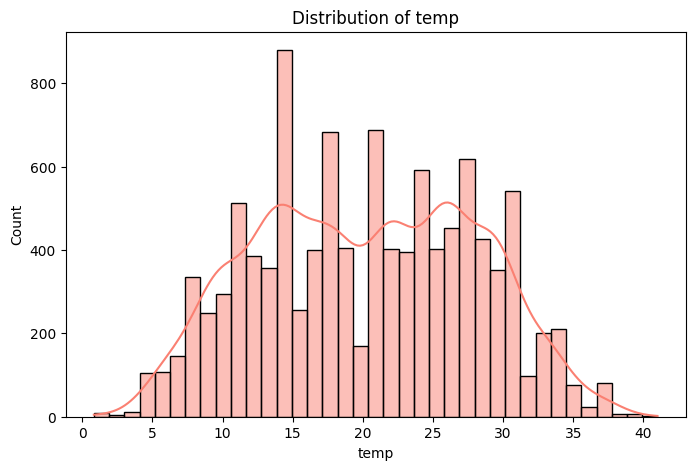

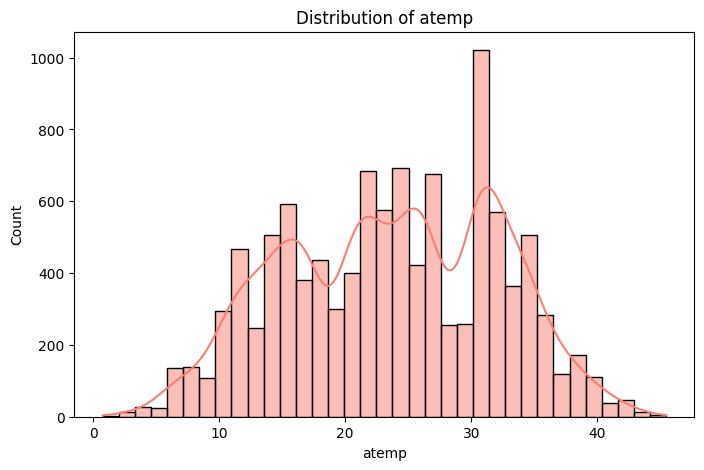

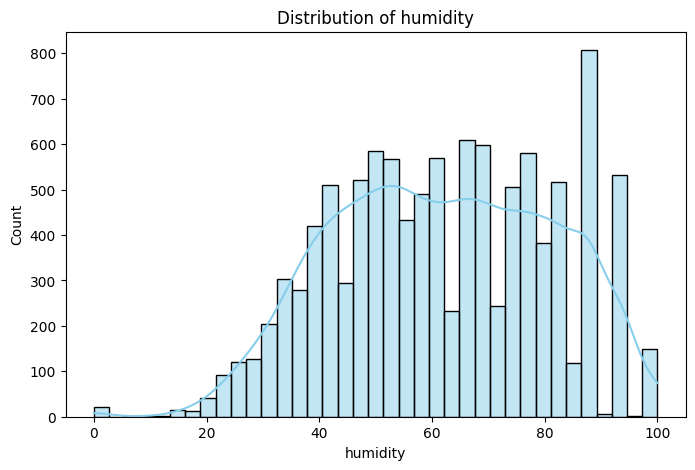

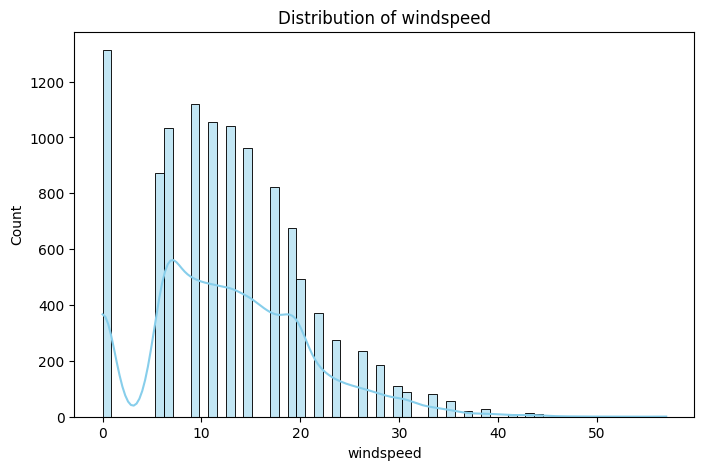

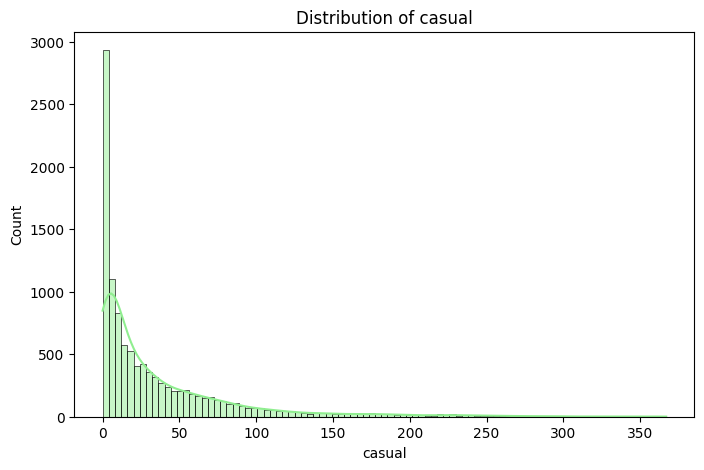

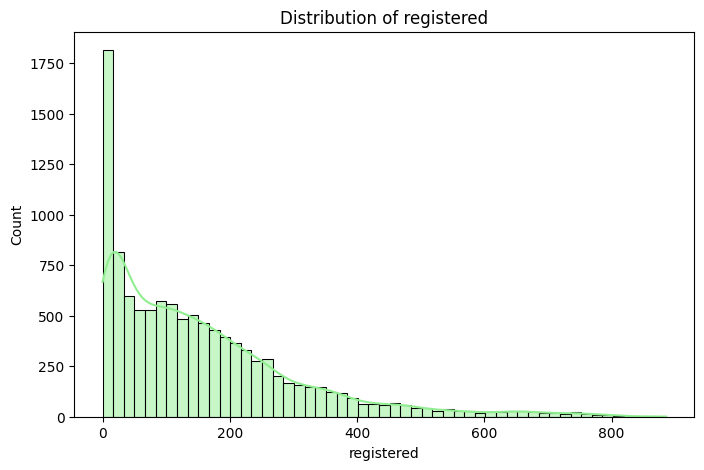

<Figure size 800x500 with 0 Axes>

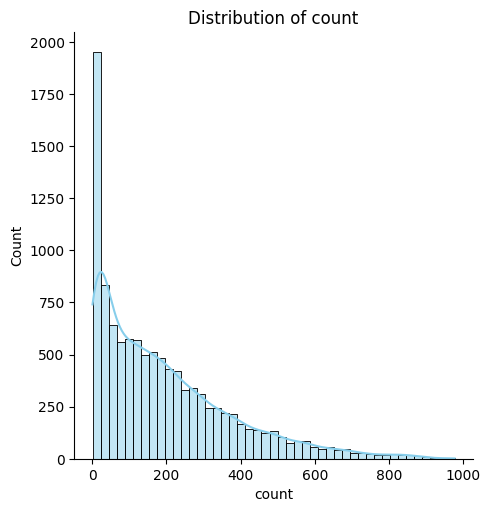

In [187]:
#Analyze the distribution of Numerical & Categorical variables, separately
numerical_cols=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for col in numerical_cols:
  plt.figure(figsize=(8,5))
  if col in ['temp', 'atemp']:
    sns.histplot(data[col],kde=True,color='salmon')
    plt.title(f"Distribution of {col}")
  elif col in ['humidity', 'windspeed']:
    sns.histplot(data[col],kde=True,color='skyblue')
    plt.title(f"Distribution of {col}")
  elif col in [ 'casual', 'registered']:
    sns.histplot(data[col],kde=True,color='lightgreen')
    plt.title(f"Distribution of {col}")
  else:
    sns.displot(data[col],kde=True,color='skyblue')
    plt.title(f"Distribution of {col}")


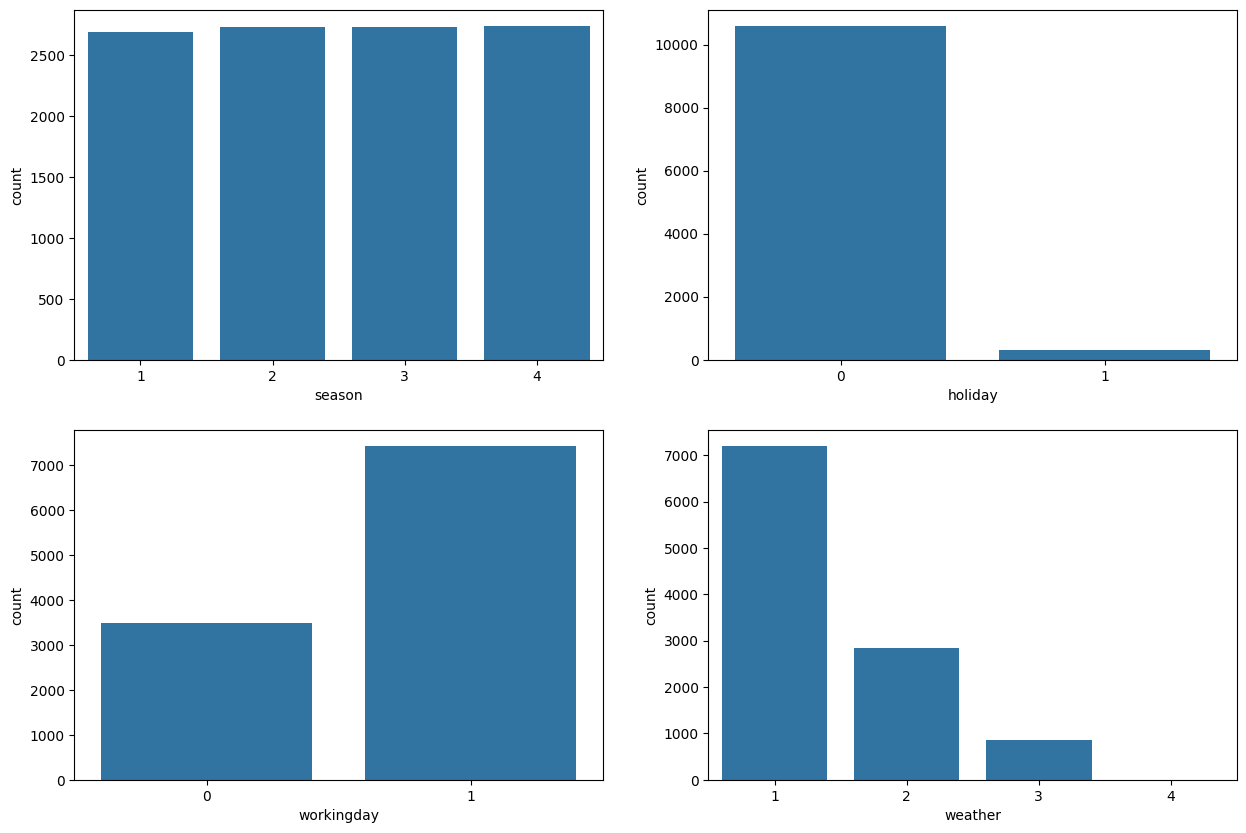

In [188]:
#For Category Column
cat_cols=['season', 'holiday', 'workingday', 'weather']
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
index=0
for col in cat_cols:
  sns.countplot(data=data,x=col,ax=axis[index//2,index%2])
  index+=1
plt.show()

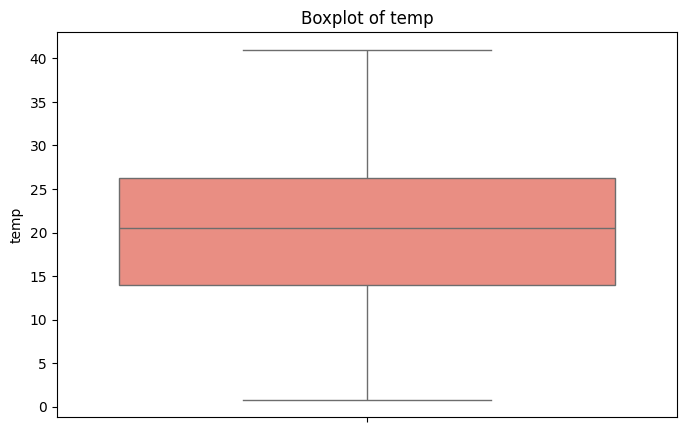

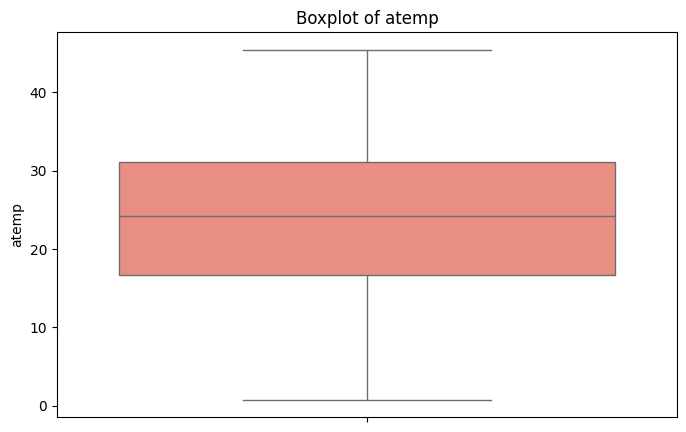

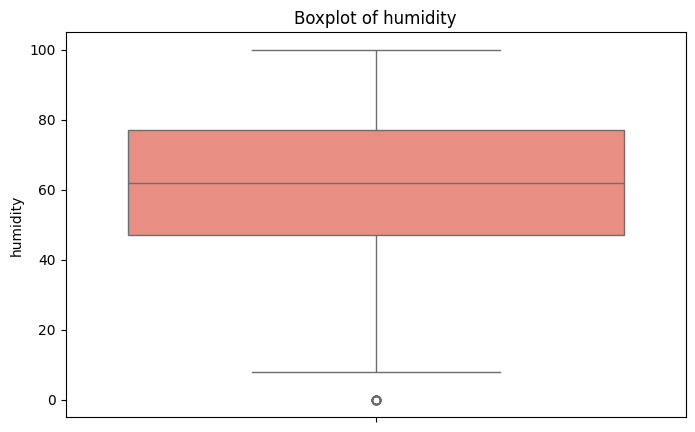

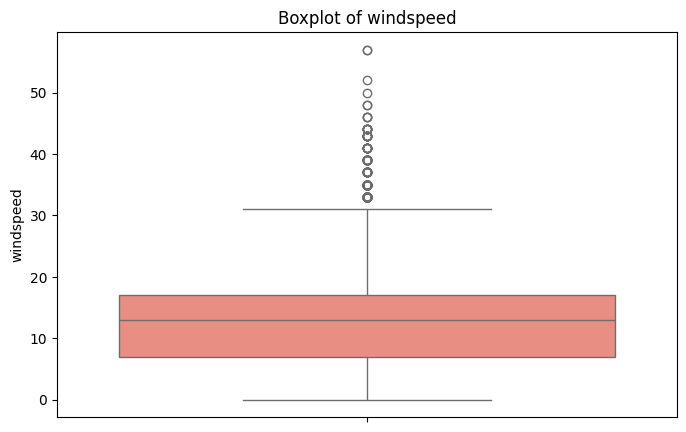

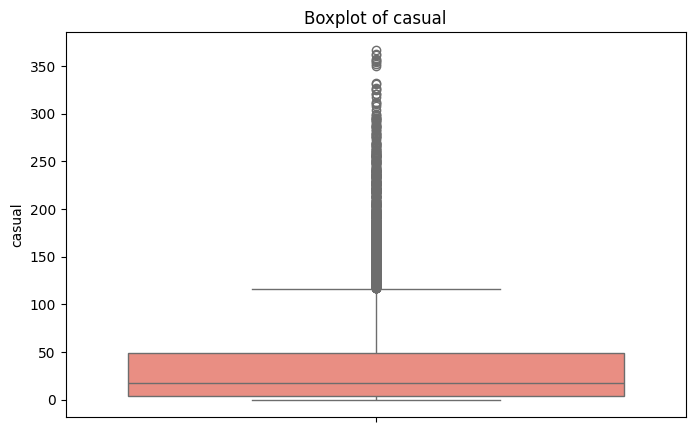

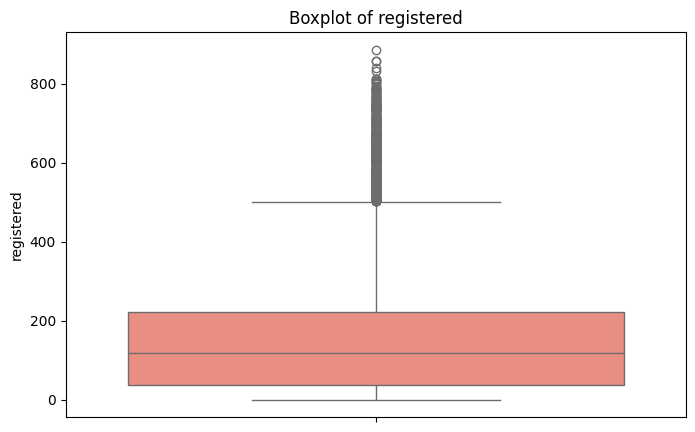

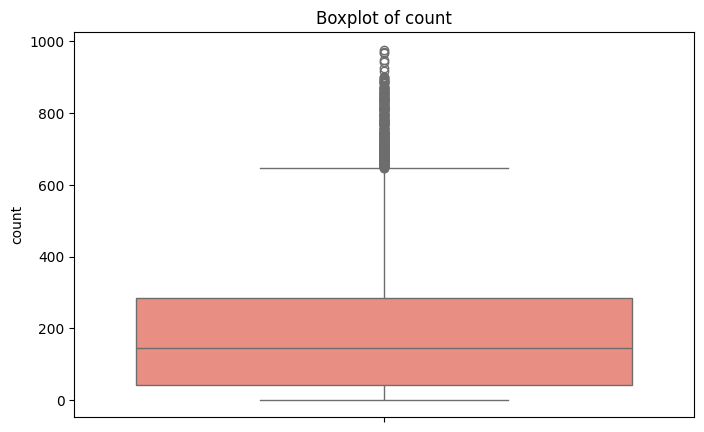

In [189]:
#For Numerical Column
for col in numerical_cols:
  plt.figure(figsize=(8,5))
  sns.boxplot(data[col],color='salmon')
  plt.title(f"Boxplot of {col}")

temp           12.3000
atemp          13.6350
humidity       29.0000
windspeed       9.9964
casual         29.0000
registered    145.0000
count         179.0000
dtype: float64
Shape of data after removing outliers: (8542, 12)


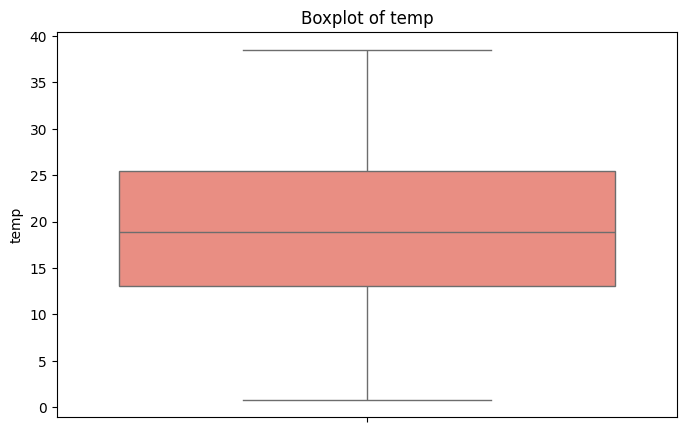

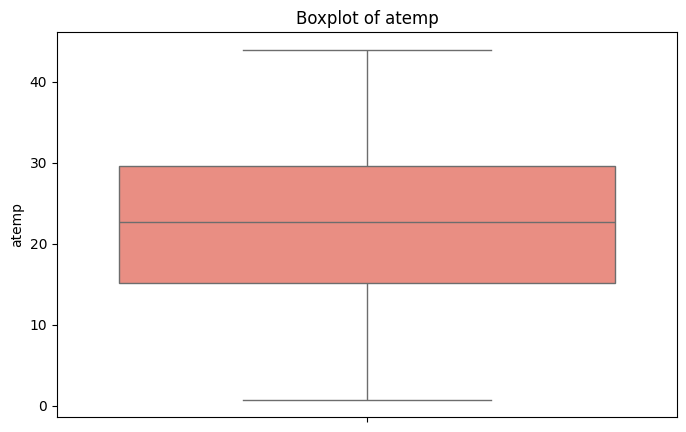

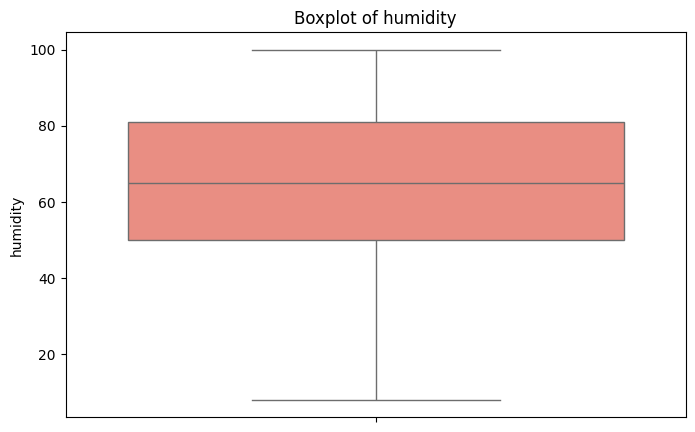

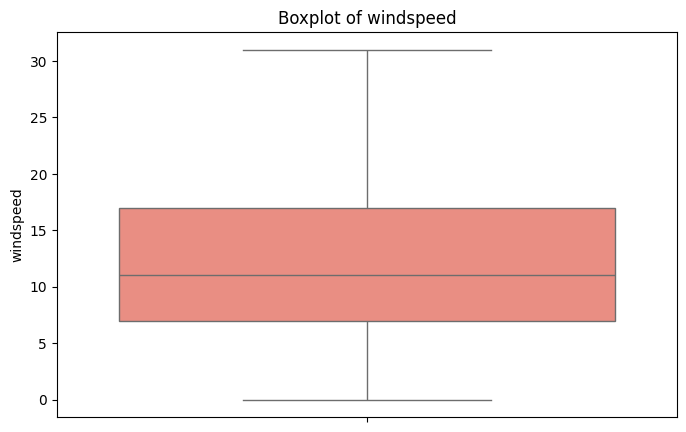

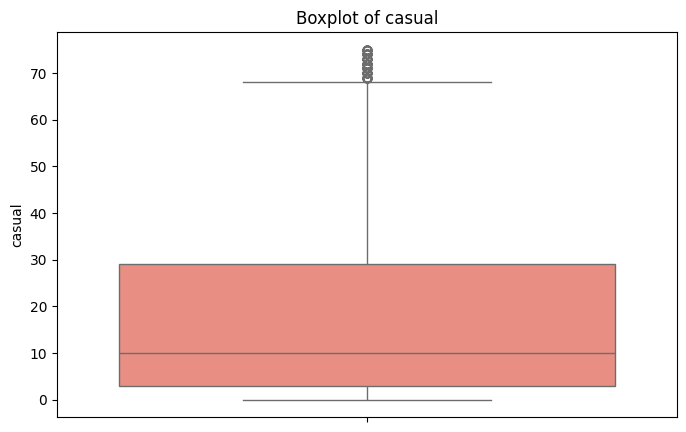

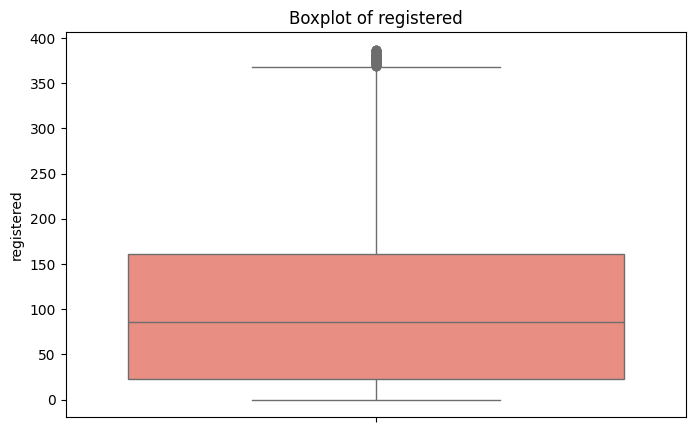

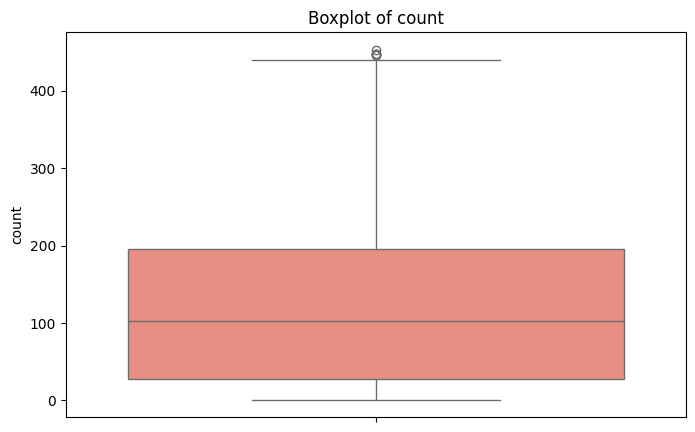

In [192]:
#Removing Outliers using IQR Method
data_num=data[numerical_cols]
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)
IQR=Q3-Q1
print(IQR)
data=data[~((data_num<(Q1-1.5*IQR)) | (data_num>(Q3+1.5*IQR))).any(axis=1)]
print('Shape of data after removing outliers:',data.shape)
#Box plot after removing outliers
for col in numerical_cols:
  plt.figure(figsize=(8,5))
  sns.boxplot(data[col],color='salmon')
  plt.title(f"Boxplot of {col}")

**2. Try establishing a Relationship between the Dependent and Independent Variables.**

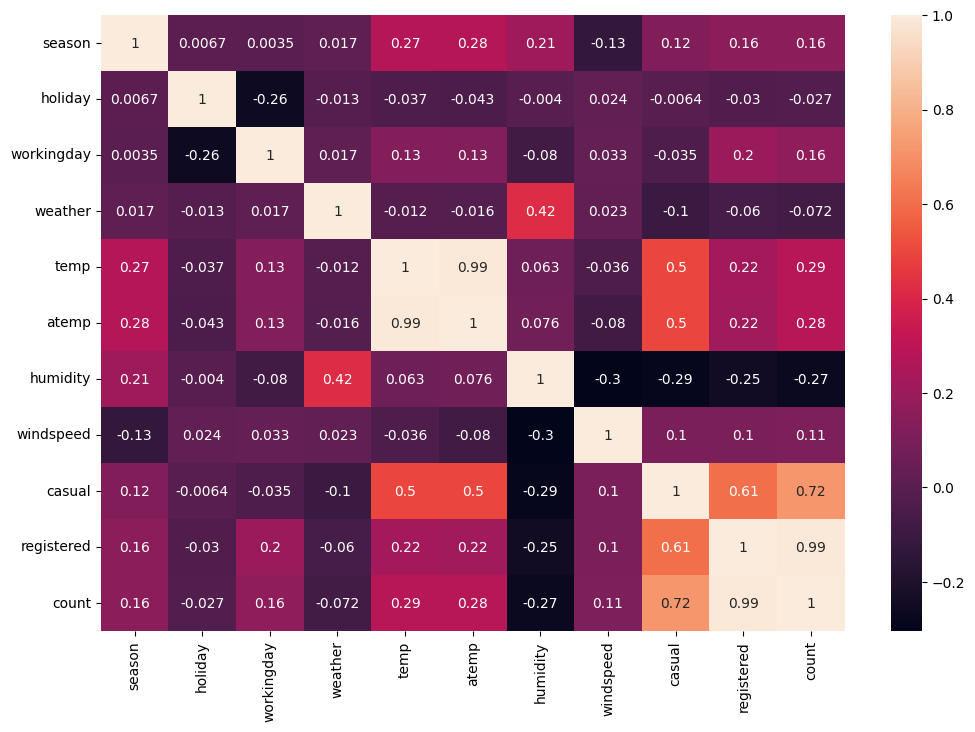

In [193]:
#i. Plot a Correlation Heatmap and draw insights.
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

**Feeling Temperature and Apparent Temperature**: Feeling temperature and apparent temperature are highly correlated, as they usually have a very small difference between them. This suggests that the two variables are closely related and may provide redundant information in some cases.

**Count, Causal, and Registered**: The variables count, causal, and registered are all highly correlated with each other. This indicates a strong relationship between them, likely because they collectively contribute to the total bike rentals

In [194]:
#ii. Remove the highly correlated variables, if any.
data = data.drop(columns=['casual', 'registered', 'atemp'])

**3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

**a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

HO:There is no significant difference between no. of bike rides on weekdays and no. of bike rides on weekend.

H1:There is a significant difference between no. of bike rides on weekdays and no. of bike rides on weekend.

Let m1
 and m2
 be the average no. of bike rides on weekdays and weekends respectively.

Mathematically, the above formulated hypothesis can be written as:

HO:m1=m2

H1:m1<>m2



In [195]:
Weekdays=data[data['workingday']==1]['count']
Weekends=data[data['workingday']==0]['count']

Taking same no. of samples as we know that unequal sample sizes and variances dramatically affect the statistical power of a test

**b. Select an appropriate test -**
A t-test looks at two sets of data that are different from each other, with no standard deviation or variance.
And in the Problem,we are talking about two independent groups.So we will apply the 2- Sample Independent T-test

**c. Set a significance level**

In [197]:
alpha=0.05

**d. Calculate test Statistics / p-value**

In [198]:
tstats,p_value=ttest_ind(Weekdays,Weekends)
print('t_Statistics:',tstats)
print('p_value:',p_value)
if p_value<alpha:
  print('Reject Null Hypothesis')
  print('There is a significant difference between no. of bike rides on weekdays and no. of bike rides on weekend.')
else:
  print('Fail to reject Null Hypothesis')
  print('There is no significant difference between no. of bike rides on weekdays and no. of bike rides on weekend.')

t_Statistics: 15.429391986702548
p_value: 5.367450562732083e-53
Reject Null Hypothesis
There is a significant difference between no. of bike rides on weekdays and no. of bike rides on weekend.


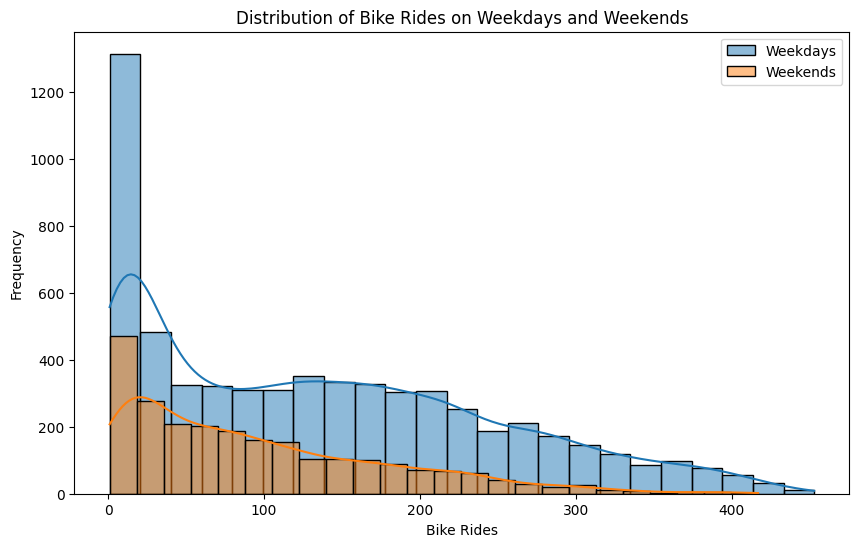

In [199]:
plt.figure(figsize=(10, 6))
sns.histplot(Weekdays, label='Weekdays', kde=True)
sns.histplot(Weekends, label='Weekends', kde=True)
plt.title('Distribution of Bike Rides on Weekdays and Weekends')
plt.xlabel('Bike Rides')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Insights:**

The p-value obtained from the t-test indicates whether there is a statistically significant difference in the number of bike rides between weekdays and weekends.

The visual distribution plot helps to understand how bike rides vary between weekdays and weekends.

**4. Check if the demand of bicycles on rent is the same for different Weather
conditions?**

**a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

**Ho**:The average no. of bike rides in different weather conditions are equal.

**Ha**:The average no. of bike rides in different weather conditions are not equal.

In [200]:
data['weather'].value_counts()

weather
1    5451
2    2343
3     747
4       1
Name: count, dtype: int64

In [201]:
# droping the weather= 4, as there is only 1 value in the dataset
data = data[~(data['weather']==4)]

In [202]:
w1 = data[data['weather']==1]['count']
w2 = data[data['weather']==2]['count']
w3 = data[data['weather']==3]['count']

This is a problem, concerning three independent population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
*   The samples are independent.
*  Each sample is from a normally distributed population.
*   The population variance of the groups are equal.
Now, we will be using the following statistical tests to check the normality and eqality of variance of the data set -

*   For testing of normality, Histogram, Q-Q Plot,Shapiro-Wilk’s test are applied to the response variable.
*  For equality of variance, Levene test is applied to the response variable.





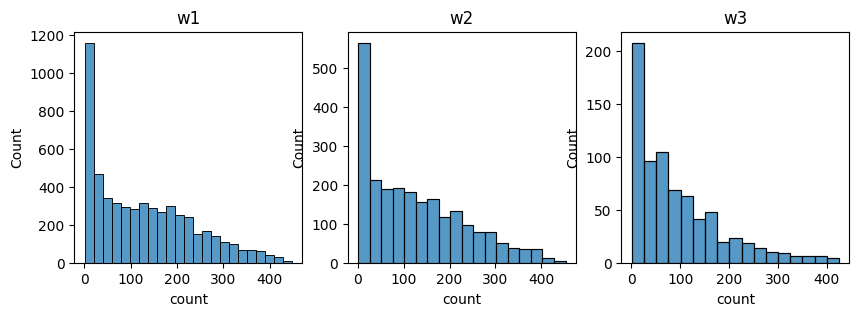

In [203]:
#c. Check assumptions of the test
#i. Normality
#Histogram
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
sns.histplot(w1)
plt.title('w1')

plt.subplot(1, 3, 2)
sns.histplot(w2)
plt.title('w2')

plt.subplot(1, 3, 3)
sns.histplot(w3)
plt.title('w3')
plt.show()

Since The Histogram is showing right skewed data,most of the data points lie on the left side,not in the middle,so it is not following normal distribution.

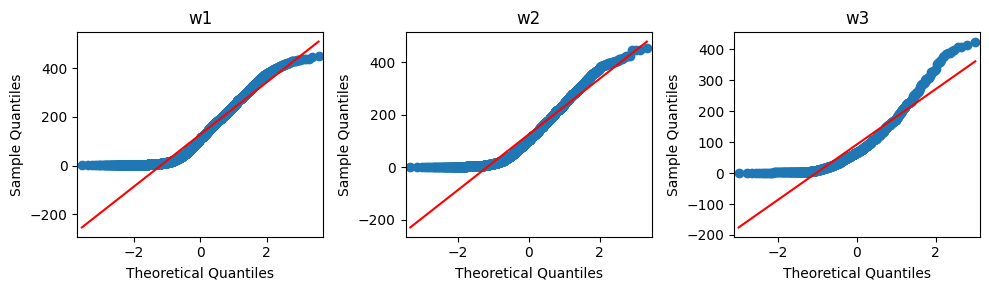

In [204]:
weather=[w1,w2,w3]
plt.figure(figsize=(10, 3))
for i, season in enumerate(weather):
    plt.subplot(1, 3, i+1)
    qqplot(season, line='s', ax=plt.gca())
    plt.title(f'w{i+1}')
plt.tight_layout()
plt.show()

From the above plot,

We can see that points deviate from the straight line.

This means that the groups w1,w2,w3 does not follow a Normal Distribution.

In [205]:
#ii. Equality Variance
#Levene's test for equality of variance
stats,p_value=levene(w1,w2,w3)
print('Test statistic:',stats)
print('p-value:',p_value)
if p_value<0.05:
  print('Reject Null Hypothesis')
  print('Variance of the groups are not equal')
else:
  print('Fail to reject Null Hypothesis')
  print('Variance of the groups are equal')

Test statistic: 40.749025531567575
p-value: 2.4369782396020133e-18
Reject Null Hypothesis
Variance of the groups are not equal


**b. Select an appropriate test -**
Since the feature count does not match the assumptions required for **ANOVA**,we mentioned above,we need to use non-parametric alternative.one such alternative is **Kruskal-Walis test**,which is non-parametric version of **ANOVA** and is suitable for comparing groups when the assumptions of **ANOVA** are not met.

In [206]:
#d.Set a significance level
alpha=0.05

In [207]:
#Perform Kruskal-Walis Test
stats,p_value=kruskal(w1,w2,w3)
print('Test statistic:',stats)
print('p-value:',p_value)
#e. Decide whether to accept or reject the Null Hypothesis.
if p_value<alpha:
  print('Reject Null Hypothesis')
  print('There is a significant difference between no. of bike rides in different weather conditions.')
else:
  print('Fail to reject Null Hypothesis')
  print('There is no significant difference between no. of bike rides in different weather conditions.')

Test statistic: 63.98681717724428
p-value: 1.2747915987558921e-14
Reject Null Hypothesis
There is a significant difference between no. of bike rides in different weather conditions.


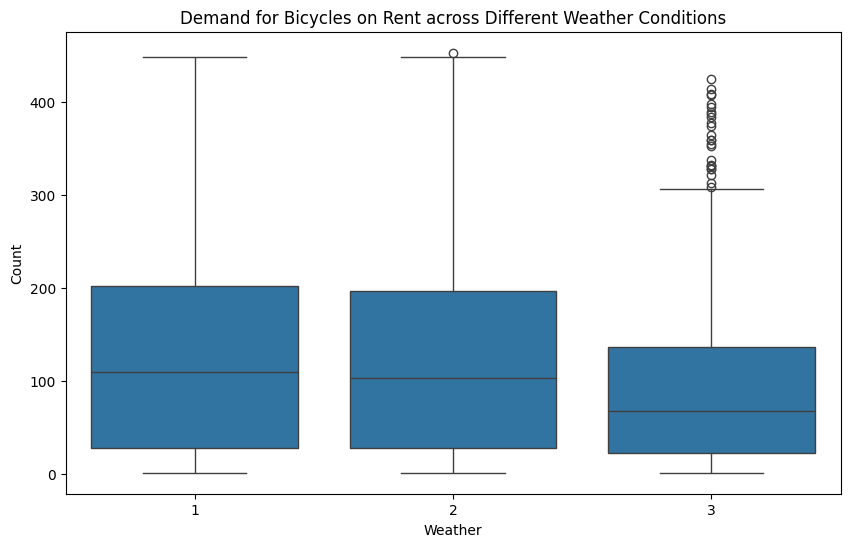

In [208]:
#f. Plotting the boxplot for visual understanding
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=data)
plt.title('Demand for Bicycles on Rent across Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

**Insights:**

The p-value from the **Kruskal-Walis** test indicates whether there is a statistically significant difference in bike demand across different weather conditions.

The boxplot visually shows the distribution of bike counts across different weather conditions, highlighting the variations in demand.

**5. Check if the demand of bicycles on rent is the same for different Seasons?**

Same as 4th question,This is also a problem of **One-Way ANOVA** test,So first we have to check the assumptions of **One-Way ANOVA** test are matching or not,if no,Then we will go with **Kruskal-Walis Test**

**a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

Null Hypothesis (H0): There is no significant difference in the demand for bicycles on rent across different seasons.

Alternative Hypothesis (H1): There is a significant difference in the demand for bicycles on rent across different seasons.

In [209]:
data['season'].value_counts()

season
1    2376
4    2259
2    2006
3    1900
Name: count, dtype: int64

In [210]:
s1=data[data['season']==1]['count']
s2=data[data['season']==2]['count']
s3=data[data['season']==3]['count']
s4=data[data['season']==4]['count']

In [211]:
seasons=[s1,s2,s3,s4]

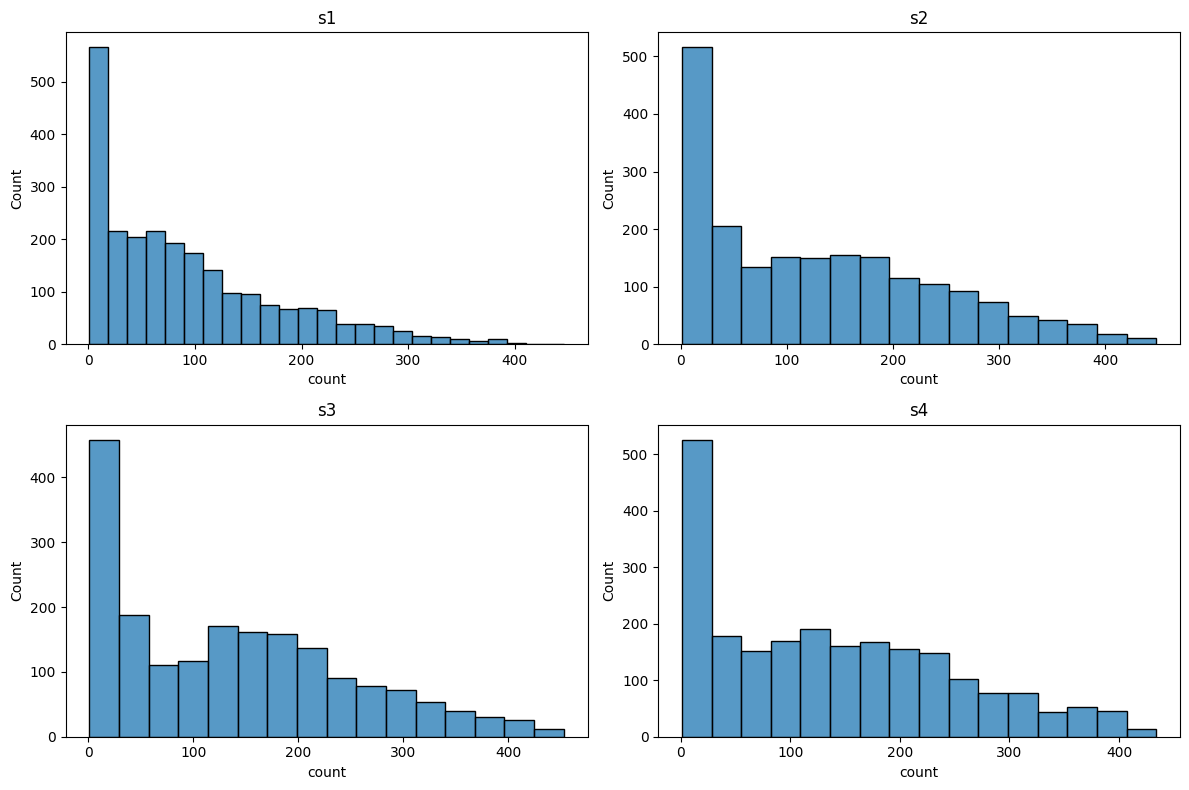

In [212]:
#c. Check assumptions of the test
#i. Normality
#Histogram
plt.figure(figsize=(12, 8))
for i, season in enumerate(seasons):
    plt.subplot(2, 2, i+1)
    sns.histplot(season)
    plt.title(f's{i+1}')
plt.tight_layout()
plt.show()

The Distribution of all season groups do not follow normal distribution.

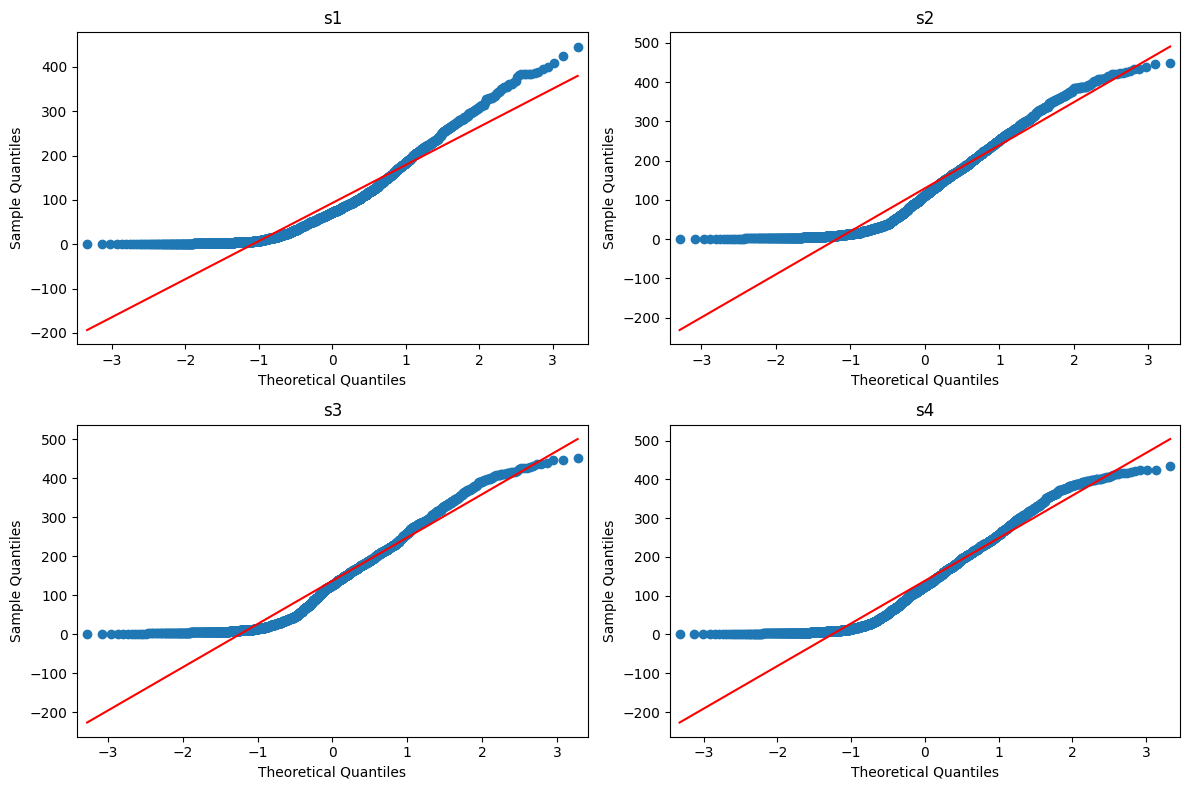

In [213]:
#QQ-Plot
plt.figure(figsize=(12, 8))
for i, season in enumerate(seasons):
    plt.subplot(2, 2, i+1)
    qqplot(season,line='s',ax=plt.gca())
    plt.title(f's{i+1}')
plt.tight_layout()
plt.show()

From the above plot,

We can see that points deviate from the straight line.

This means that the season groups s1,s2,s3,s4 does not follow a Normal Distribution.

In [216]:
#ii. Equality Variance
#Levene's test for equality of variance
stats,p_value=levene(s1,s2,s3,s4)
print('Test statistic:',stats)
print('p-value:',p_value)
if p_value<0.05:
  print('Reject Null Hypothesis')
  print('Variance of the groups are not equal')
else:
  print('Fail to reject Null Hypothesis')
  print('Variance of the groups are equal')

Test statistic: 103.04900813181392
p-value: 1.5747989886652242e-65
Reject Null Hypothesis
Variance of the groups are not equal


In [217]:
#d.Set a significance level
alpha=0.05

In [218]:
#Perform Kruskal-Walis Test
stats,p_value=kruskal(s1,s2,s3,s4)
print('Test statistic:',stats)
print('p-value:',p_value)
#e. Decide whether to accept or reject the Null Hypothesis.
if p_value<alpha:
  print('Reject Null Hypothesis')
  print('There is a significant difference in the demand for bicycles on rent across different seasons.')
else:
  print('Fail to reject Null Hypothesis')
  print('There is no significant difference in the demand for bicycles on rent across different seasons.')

Test statistic: 254.86646073240962
p-value: 5.797513080826407e-55
Reject Null Hypothesis
There is a significant difference in the demand for bicycles on rent across different seasons.


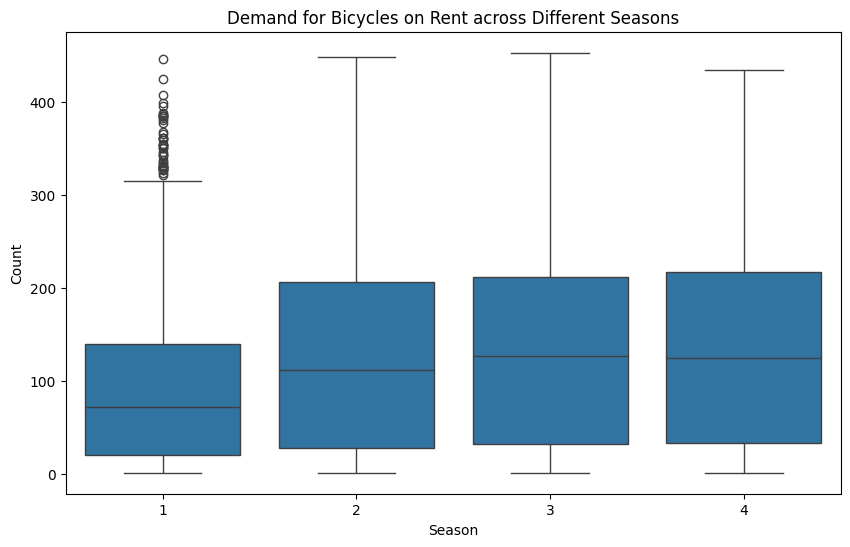

In [219]:
# f. Plotting the boxplot for visual understanding
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=data)
plt.title('Demand for Bicycles on Rent across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

Insights:

The results from the **Kruskal-Wallis H-test** show a significant difference in demand for bicycles across different seasons.

The visualizations support the findings, providing a comprehensive understanding of how seasons affect bicycle demand.

**6. Check if the Weather conditions are significantly different during different Seasons?**

Although the data values in 'season' and 'weather' columns are numerical, they still represent different catgories. Hence, we will encode them accordingly before moving onto the tests.

In [220]:
weather_category = {1: 'sunny-pleasant',
                    2: 'cloudy-delightful',
                    3: 'rainy-drenching'}
data['weather_encoded'] = data['weather'].map(weather_category)

In [221]:
season_category = {1: 'spring',
                   2: 'summer',
                   3: 'fall',
                   4: 'winter'}
data['season_encoded'] = data['season'].map(season_category)

**a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**:

**Null Hypothesis (H0)**: The weather conditions are not dependent on different seasons.

**Alternative Hypothesis (H1)**: The weather conditions are dependent on different seasons.



**b. Select an appropriate test -**
Both the variables are Categorical so chisquare test is appropriate for Analysis

In [222]:
#c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns
contigency_table = pd.crosstab(data['weather_encoded'], data['season_encoded'])
contigency_table

season_encoded,fall,spring,summer,winter
weather_encoded,,,,
cloudy-delightful,423,668,557,695
rainy-drenching,164,183,194,206
sunny-pleasant,1313,1525,1255,1358


In [223]:
#d. Set a significance level and Calculate the test Statistics / p-value.
alpha=0.05
#perform chisquare test
stats,p_value,dof,expected=chi2_contingency(contigency_table)
print('Test statistic:',stats)
print('p-value:',p_value)
#e. Decide whether to accept or reject the Null Hypothesis.
if p_value<alpha:
  print('Reject Null Hypothesis')
  print('The weather conditions are dependent on different seasons.')
else:
  print('Fail to reject Null Hypothesis')
  print('The weather conditions are not dependent on different seasons.')

Test statistic: 47.17446892922622
p-value: 1.727036047974992e-08
Reject Null Hypothesis
The weather conditions are dependent on different seasons.


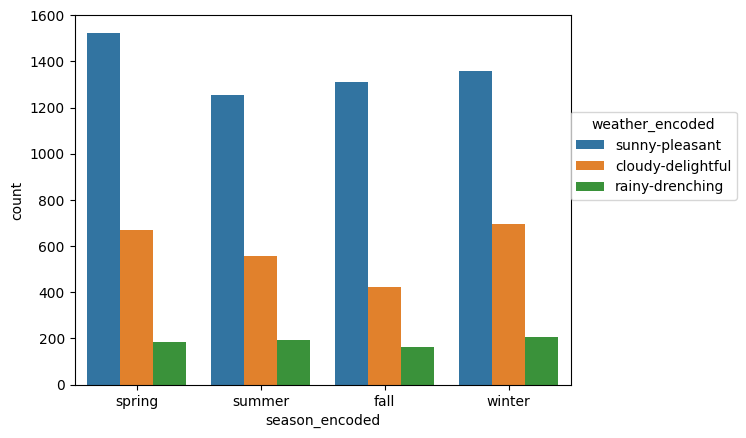

In [224]:
sns.countplot(x=data['season_encoded'], hue = data['weather_encoded'])
plt.legend(title= 'weather_encoded', loc=(1.0,0.5))

**Insights:**

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the weather conditions are dependent on the ongoing season.

**Recommendations**

Based on the analysis, the following recommendations are made to Yulu:

**Optimize Service During High Demand Periods**:

Weekdays vs. Weekends: As there is a significant difference in the number of bike rides between weekdays and weekends, Yulu should consider increasing the availability of bikes and operational staff during weekends to meet the higher demand.

Seasonal Demand: With significant seasonal variations in demand, Yulu can adjust their fleet size and promotional activities accordingly. For example, increase bike availability and marketing efforts during peak seasons (like spring and fall) and reduce during off-peak seasons (like winter).

**Weather-Based Demand Management**:

Weather Conditions: Since weather conditions significantly affect bike rental demand, Yulu can implement dynamic pricing strategies. Lower prices during adverse weather conditions (like heavy rain) to encourage usage and increase prices during favorable weather conditions.

Real-Time Weather Updates: Integrate real-time weather updates into the app to inform users about current weather conditions and offer weather-based promotions or discounts.

**User Engagement and Feedback**:

Collect and Analyze Feedback: Regularly collect feedback from users to understand their needs and preferences. Use this data to continuously improve the service.

Loyalty Programs: Implement loyalty programs to retain registered users and convert casual users into registered ones by offering rewards and benefits.

**Operational Efficiency**:

Fleet Management: Utilize data analytics to predict high-demand areas and times, optimizing the distribution and maintenance of the bike fleet. Ensure bikes are well-maintained and available where and when they are needed the most.

**Conclusion**

The analysis provides a comprehensive understanding of the factors influencing the demand for Yulu’s shared electric cycles in the Indian market.

Key insights are:

**Significant Variables**: Temperature, weather conditions, season, holiday, and working days are significant predictors of bike rental demand.

**Weekday vs. Weekend Demand**: There is a significant difference in bike rental demand between weekdays and weekends, with higher demand on weekends.

**Weather Conditions**: Demand for bicycles varies significantly across different weather conditions.

**Seasonal Variation**: There is a significant difference in bike rental demand across different seasons.

**Weather and Seasons**: We have enough statistical evidence to say that the weather conditions are dependent on the ongoing season.

By leveraging these insights, Yulu can make informed decisions to tailor their services, optimize operations, and implement strategic marketing initiatives to enhance user satisfaction and drive revenue growth. The recommendations provided aim to address the identified factors, ultimately helping Yulu to improve their service and regain profitability in the competitive micro-mobility market.

